In [1]:

import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/pangeo-forge/EOBS-feedstock/eobs-tg-tn-tx-rr-hu-pp.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})


In [2]:
target_lat = 62.1
target_lon = 9.25

In [3]:
tg_norway = ds['tg'].sel(
    latitude=target_lat, 
    longitude=target_lon, 
    method='nearest'
).sel(time=slice('2002-01-01', '2020-12-31'))

In [4]:
monthly_mean_full = tg_norway.resample(time='1M').mean()

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [5]:

import xarray as xr

store = 'gs://leap-persistent-ro/data-library/feedstocks/metaflux_feedstock/meatflux_monthly.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})


In [6]:
gpp_2002_2020 = ds.sel(time=slice('2002-01-01', '2020-12-31'))
lat_norway = 62.15
lon_norway = 9.25
norway_gpp = gpp_2002_2020.sel(
    latitude=lat_norway, 
    longitude=lon_norway, 
    method='nearest'
)


In [7]:
norway_reco = gpp_2002_2020.sel(
    latitude=lat_norway, 
    longitude=lon_norway, 
    method='nearest'
)['RECO']

norway_nee = norway_reco - norway_gpp.GPP

In [8]:
monthly_gpp_total = norway_gpp.GPP * norway_gpp.time.dt.days_in_month
monthly_reco_total = norway_reco * norway_reco.time.dt.days_in_month
monthly_nee_total = monthly_reco_total - monthly_gpp_total

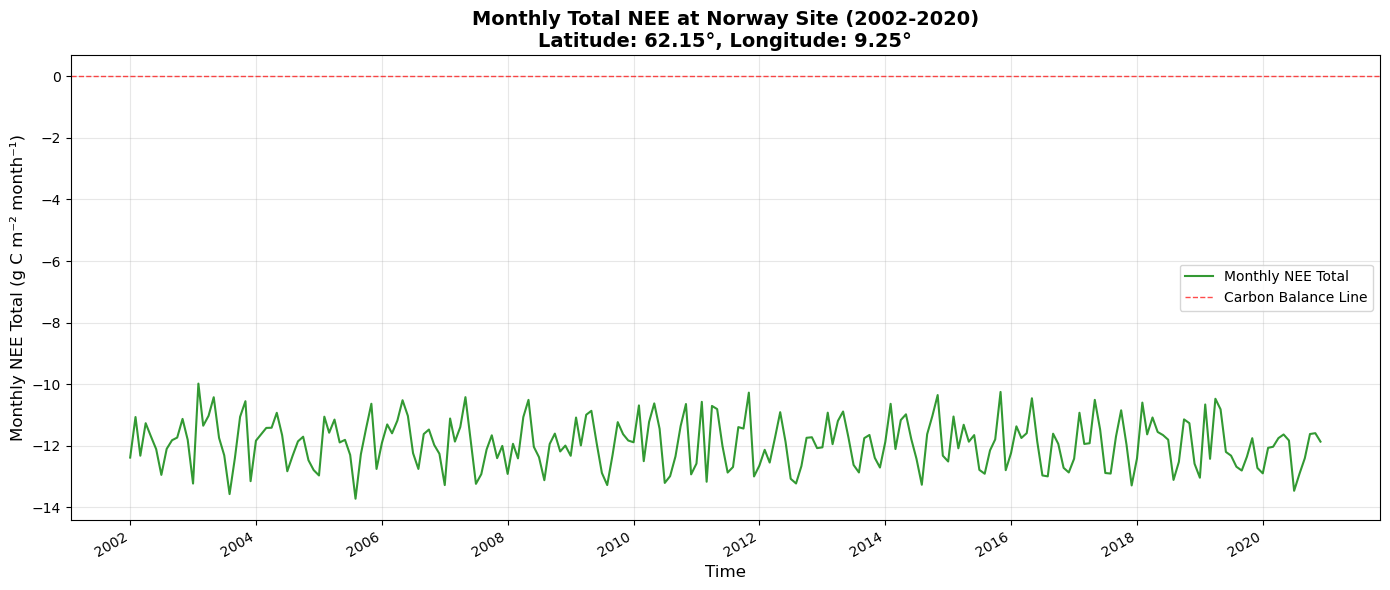

Time range: 2002-01-01T00:00:00.000000000 to 2020-12-01T00:00:00.000000000
Mean: -11.91 g C m⁻² month⁻¹
Range: [-13.73, -9.98] g C m⁻² month⁻¹
Standard deviation: 0.79 g C m⁻² month⁻¹


In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(monthly_nee_total.time.values, monthly_nee_total.values, 
         linewidth=1.5, color='green', alpha=0.8, label='Monthly NEE Total')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Carbon Balance Line')
plt.ylabel('Monthly NEE Total (g C m⁻² month⁻¹)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title(f'Monthly Total NEE at Norway Site (2002-2020)\nLatitude: {lat_norway}°, Longitude: {lon_norway}°', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


print(f"Time range: {monthly_nee_total.time.min().values} to {monthly_nee_total.time.max().values}")
print(f"Mean: {monthly_nee_total.mean().values:.2f} g C m⁻² month⁻¹")
print(f"Range: [{monthly_nee_total.min().values:.2f}, {monthly_nee_total.max().values:.2f}] g C m⁻² month⁻¹")
print(f"Standard deviation: {monthly_nee_total.std().values:.2f} g C m⁻² month⁻¹")

r: -0.2162
R-squared (r²): 0.0467
P-value: 1.02e-03


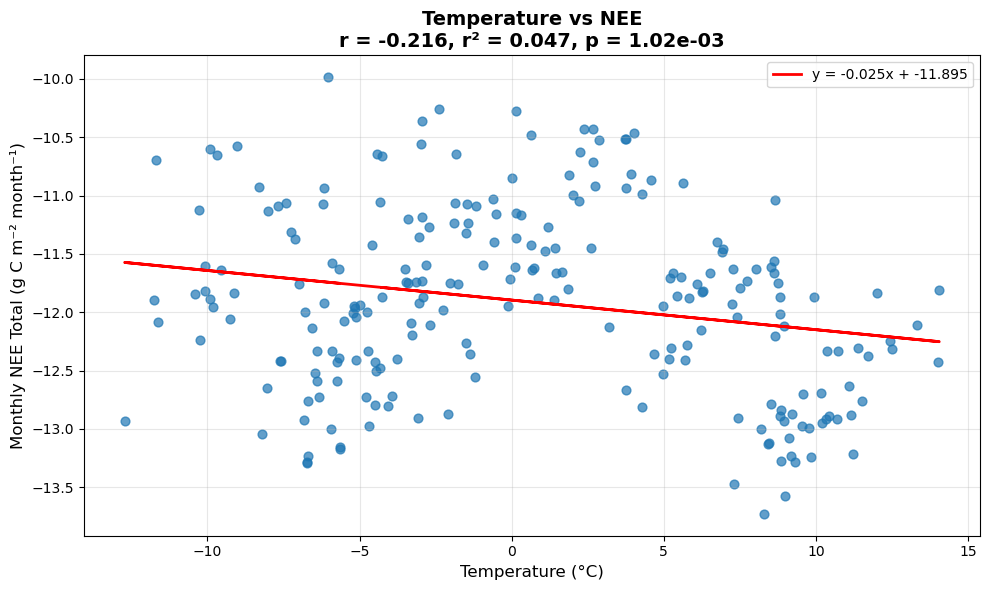

In [10]:
import numpy as np
from scipy import stats


temp_values = monthly_mean_full.values
nee_values = monthly_nee_total.values

correlation = np.corrcoef(temp_values, nee_values)[0, 1]
r_squared = correlation ** 2


corr_test = stats.pearsonr(temp_values, nee_values)

print(f"r: {correlation:.4f}")
print(f"R-squared (r²): {r_squared:.4f}")
print(f"P-value: {corr_test.pvalue:.2e}")

plt.figure(figsize=(10, 6))
plt.scatter(temp_values, nee_values, alpha=0.7, s=40)

z = np.polyfit(temp_values, nee_values, 1)
p = np.poly1d(z)
plt.plot(temp_values, p(temp_values), "r-", linewidth=2, 
         label=f'y = {z[0]:.3f}x + {z[1]:.3f}')

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Monthly NEE Total (g C m⁻² month⁻¹)', fontsize=12)
plt.title(f'Temperature vs NEE\nr = {correlation:.3f}, r² = {r_squared:.3f}, p = {corr_test.pvalue:.2e}', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [11]:

import xarray as xr

store = 'https://nyu1.osn.mghpcc.org/leap-pangeo-pipeline/MODIS_LAI/MODIS_LAI.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})


In [12]:
norway_lai = ds.sel(
    lat=lat_norway,
    lon=lon_norway, 
    method='nearest'
)

In [13]:
lai= norway_lai.sel(time=slice('2002-01-01', '2020-12-31'))

In [14]:
monthly_lai = lai['lai'].resample(time='1M').mean()

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


r: -0.4537
R-squared (r²): 0.2059
P-value: 5.61e-13


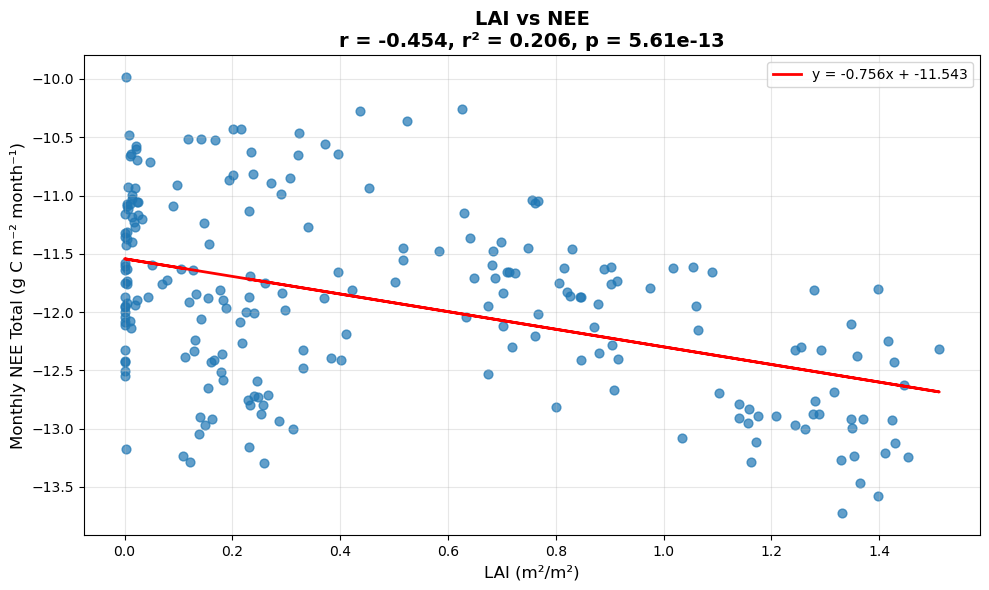

In [15]:
lai_values = monthly_lai.values
nee_values = monthly_nee_total.values

correlation = np.corrcoef(lai_values, nee_values)[0, 1]
r_squared = correlation ** 2


corr_test = stats.pearsonr(lai_values, nee_values)

print(f"r: {correlation:.4f}")
print(f"R-squared (r²): {r_squared:.4f}")
print(f"P-value: {corr_test.pvalue:.2e}")

plt.figure(figsize=(10, 6))
plt.scatter(lai_values, nee_values, alpha=0.7, s=40)

z = np.polyfit(lai_values, nee_values, 1)
p = np.poly1d(z)
plt.plot(lai_values, p(lai_values), "r-", linewidth=2, 
         label=f'y = {z[0]:.3f}x + {z[1]:.3f}')

plt.xlabel('LAI (m²/m²)', fontsize=12)
plt.ylabel('Monthly NEE Total (g C m⁻² month⁻¹)', fontsize=12)
plt.title(f'LAI vs NEE\nr = {correlation:.3f}, r² = {r_squared:.3f}, p = {corr_test.pvalue:.2e}', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [16]:

import xarray as xr

store = 'gs://leap-persistent/data-library/GPCP-daily/GPCP-daily.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})


In [17]:
norway_precip = ds.sel(
    latitude=lat_norway,
    longitude=lon_norway, 
    method='nearest'
)

In [18]:

precip_2002_2020 = norway_precip.sel(time=slice('2002-01-01', '2020-12-31'))
monthly_precip = precip_2002_2020['precip'].resample(time='1M').sum()

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


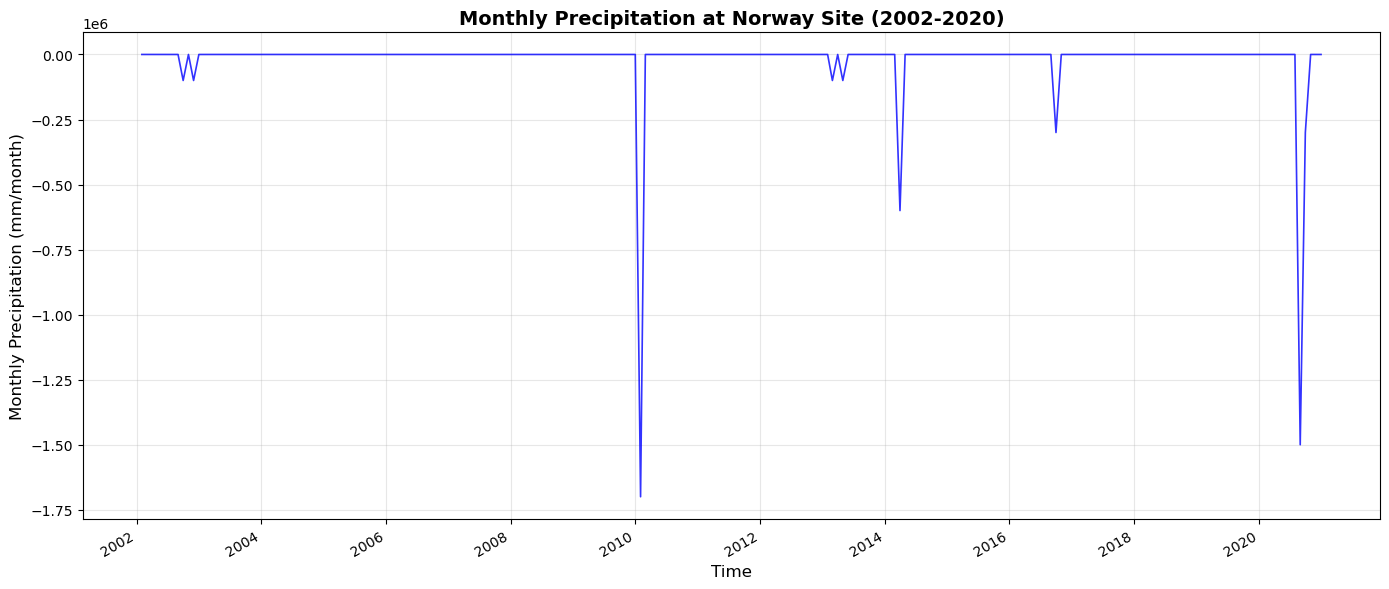

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(monthly_precip.time.values, monthly_precip.values, 
         linewidth=1.2, color='blue', alpha=0.8)

plt.ylabel('Monthly Precipitation (mm/month)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('Monthly Precipitation at Norway Site (2002-2020)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

In [20]:


print(precip_2002_2020)

print(f"Min: {precip_2002_2020.precip.min().values}")
print(f"Max: {precip_2002_2020.precip.max().values}")
print(f"Avg: {precip_2002_2020.precip.mean().values}")
print(f"Std: {precip_2002_2020.precip.std().values}")




<xarray.Dataset> Size: 194kB
Dimensions:      (nv: 2, time: 6940)
Coordinates:
  * time         (time) datetime64[ns] 56kB 2002-01-01 2002-01-02 ... 2020-12-31
    latitude     float32 4B 62.0
    longitude    float32 4B 9.0
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (nv) float32 8B dask.array<chunksize=(2,), meta=np.ndarray>
    lon_bounds   (nv) float32 8B dask.array<chunksize=(2,), meta=np.ndarray>
    time_bounds  (time, nv) datetime64[ns] 111kB dask.array<chunksize=(82, 2), meta=np.ndarray>
    precip       (time) float32 28kB dask.array<chunksize=(82,), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:52:42Z, Dr. Jian-Jian Wang, ...

In [21]:
daily_precip = precip_2002_2020.precip
daily_precip_loaded = daily_precip.load()
negative_count = (daily_precip_loaded < 0).sum().values
total_count = len(daily_precip_loaded)

In [22]:
clean_daily_precip = daily_precip_loaded.where(daily_precip_loaded >= 0)


print(f"Valid Data Points: {clean_daily_precip.count().values}/{total_count}")
print(f"Data Range: [{clean_daily_precip.min().values:.2f}, {clean_daily_precip.max().values:.2f}] mm/day")
print(f"Average Daily Rainfall: {clean_daily_precip.mean().values:.2f} mm/day")

Valid Data Points: 6892/6940
Data Range: [0.00, 26.18] mm/day
Average Daily Rainfall: 2.46 mm/day


In [23]:
monthly_precip_clean = clean_daily_precip.resample(time='1M').sum()

print(f"Data Range: [{monthly_precip_clean.min().values:.2f}, {monthly_precip_clean.max().values:.2f}] mm/month")
print(f"Average monthly Rainfall: {monthly_precip_clean.mean().values:.2f} mm/month")

Data Range: [10.38, 157.02] mm/month
Average monthly Rainfall: 74.47 mm/month


/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


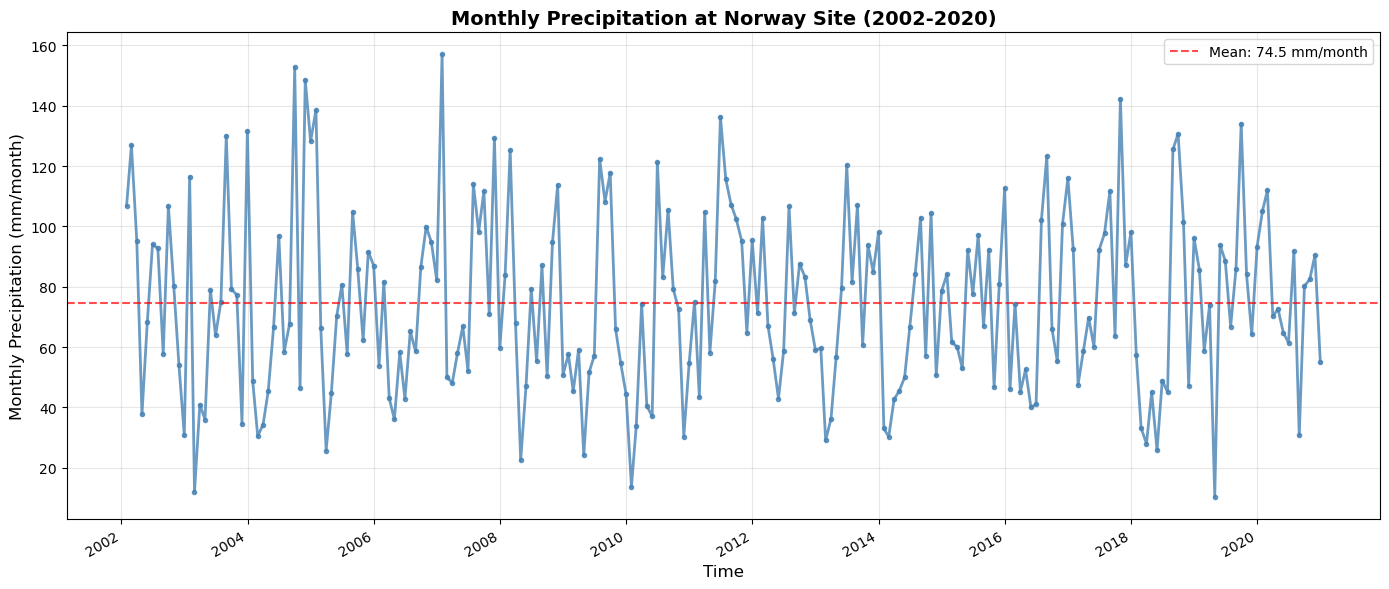

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(monthly_precip_clean.time.values, monthly_precip_clean.values, 
         linewidth=2, color='steelblue', alpha=0.8, marker='o', markersize=3)

plt.ylabel('Monthly Precipitation (mm/month)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('Monthly Precipitation at Norway Site (2002-2020)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)


mean_precip = monthly_precip_clean.mean().values
plt.axhline(y=mean_precip, color='red', linestyle='--', alpha=0.7, 
            label=f'Mean: {mean_precip:.1f} mm/month')

plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


r: -0.5355
R-squared (r²): 0.2868
P-value: 2.55e-18


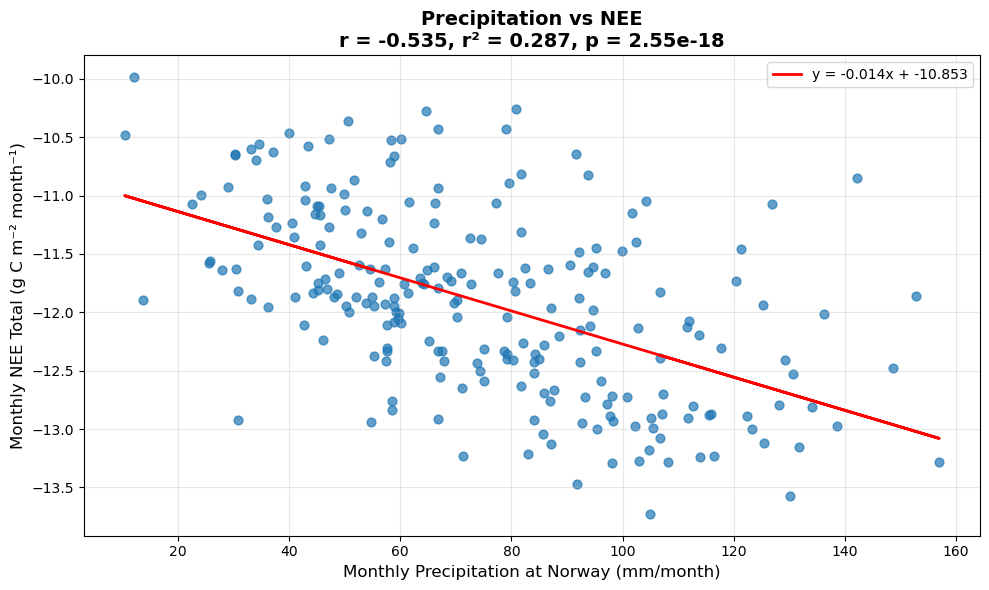

In [25]:
pre_values = monthly_precip_clean.values
nee_values = monthly_nee_total.values

correlation = np.corrcoef(pre_values, nee_values)[0, 1]
r_squared = correlation ** 2


corr_test = stats.pearsonr(pre_values, nee_values)

print(f"r: {correlation:.4f}")
print(f"R-squared (r²): {r_squared:.4f}")
print(f"P-value: {corr_test.pvalue:.2e}")

plt.figure(figsize=(10, 6))
plt.scatter(pre_values, nee_values, alpha=0.7, s=40)

z = np.polyfit(pre_values, nee_values, 1)
p = np.poly1d(z)
plt.plot(pre_values, p(pre_values), "r-", linewidth=2, 
         label=f'y = {z[0]:.3f}x + {z[1]:.3f}')

plt.xlabel('Monthly Precipitation at Norway (mm/month)', fontsize=12)
plt.ylabel('Monthly NEE Total (g C m⁻² month⁻¹)', fontsize=12)
plt.title(f'Precipitation vs NEE\nr = {correlation:.3f}, r² = {r_squared:.3f}, p = {corr_test.pvalue:.2e}', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

ml_data = pd.DataFrame({
    'time': monthly_precip_clean.time.values,
    'temperature': monthly_mean_full.values,
    'lai': monthly_lai.values,
    'precipitation': monthly_precip_clean.values,
    'nee': monthly_nee_total.values 
})

print(ml_data.head())
print(f"Shape: {ml_data.shape}")

        time  temperature       lai  precipitation        nee
0 2002-01-31    -5.661290  0.111640     106.822304 -12.389620
1 2002-02-28    -6.188571  0.005210     126.971954 -11.071642
2 2002-03-31    -4.732258  0.000000      95.268974 -12.328427
3 2002-04-30     1.192667  0.020144      37.684628 -11.272329
4 2002-05-31     5.573548  0.233350      68.357285 -11.693965
Shape: (228, 5)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = ml_data[['temperature', 'lai', 'precipitation']]
y = ml_data['nee']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=300, num=5)],  
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(5, 55, num=11)] + [None],  
    'min_samples_split': [5, 10, 15, 25],
    'min_samples_leaf': [4, 8, 12, 16],
    'bootstrap': [True, False]
}

In [29]:
rf = RandomForestRegressor(random_state=42)

In [30]:
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=50,  
    cv=5,        
    verbose=2,   
    random_state=42,
    n_jobs=-1    
)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=16, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=55, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=55, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=1

In [69]:
best_params = rf_random.best_params_
for key, value in best_params.items():
    print(f"{key}: {value}")

print(f"Optimal CV score: {rf_random.best_score_:.4f}")


n_estimators: 300
min_samples_split: 5
min_samples_leaf: 4
max_features: log2
max_depth: 15
bootstrap: False
Optimal CV score: 0.6122

[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=100; total time=   0.1s

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, max_depth=55, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, max_depth=55, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, max_depth=55, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, max_depth=55,

In [72]:
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² : {r2:.4f}")

MSE: 0.2727
RMSE: 0.5222
MAE: 0.4545
R² : 0.6263


temperature: 0.3168
lai: 0.3385
precipitation: 0.3448


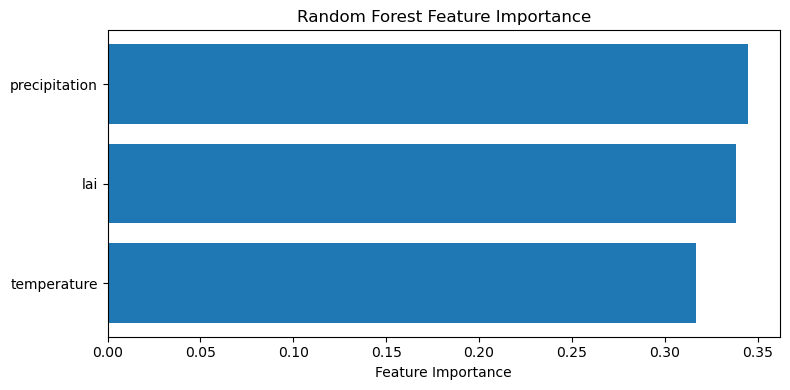

In [77]:
feature_importance = best_rf.feature_importances_
features = X.columns


for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")


plt.figure(figsize=(8, 4))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()